In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/drive/MyDrive/ML_Results/preprocessed.csv")

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values


X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

svm = SVC(C = 1, kernel = 'rbf' , gamma = 0.1)
history = svm.fit(X_train, y_train)
y_pred = svm.predict(sc.transform(X_test))
accuracy = svm.score(sc.transform(X_test), y_test)

print("Accuracy: ", accuracy*100,'%')

Accuracy:  98.0 %


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (
    svm, classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=1, gamma=0.1):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.89      0.96      0.93        26

    accuracy                           0.98       200
   macro avg       0.94      0.97      0.96       200
weighted avg       0.98      0.98      0.98       200




In [ ]:
################# Confusion matrix
y_pred = svm.predict(sc.transform(X_test))
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[171   3]
 [  1  25]]

Model accuracy:  0.98


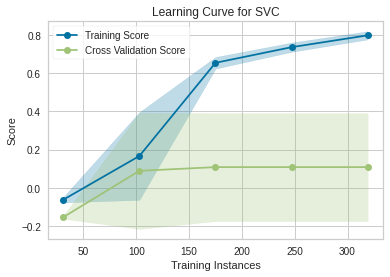

In [ ]:
# Learning curve
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(svm, scoring='r2')

visualizer.fit(np.append(X_valid, X_test, axis = 0),np.append(y_valid, y_test, axis = 0)) 
visualizer.show()

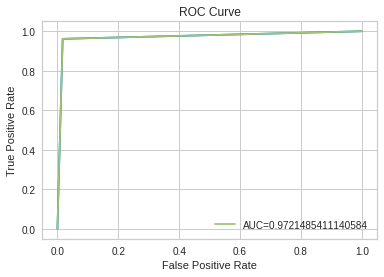

In [ ]:
################## ROC Curve
y_pred = svm.predict(sc.transform(X_test)).ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
fileName = "/content/drive/MyDrive/ML_Results_Main/SVM_Numeric_98.model"
pickle.dump(svm, open(fileName, 'wb'))